# 回帰不連続デザイン（RDD）

特定の閾値（カットオフ）を基準に、処置（介入）を受けたグループと受けていないグループを比較する手法。因果推論の一種であり、政策評価やマーケティングなどの分野で使われる。

https://chatgpt.com/c/67b09682-67c4-8006-81c3-33ac09e5b209

In [2]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.linear_model import LinearRegression

# データの読み込み
df = pd.read_csv('../data/student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


ポルトガルの中学生
- Dalc: 平日のアルコール摂取量
- G3: 最終成績

In [14]:
df['Dalc'].value_counts()

Dalc
1    451
2    121
3     43
5     17
4     17
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Dalc    649 non-null    int64
 1   G3      649 non-null    int64
dtypes: int64(2)
memory usage: 10.3 KB
None
             Dalc          G3
count  649.000000  649.000000
mean     1.502311   11.906009
std      0.924834    3.230656
min      1.000000    0.000000
25%      1.000000   10.000000
50%      1.000000   12.000000
75%      2.000000   14.000000
max      5.000000   19.000000


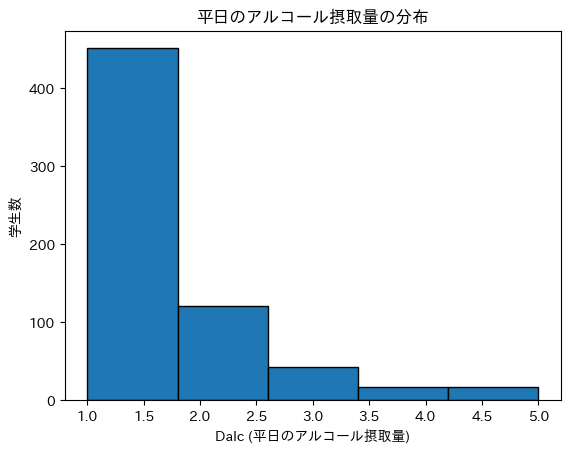

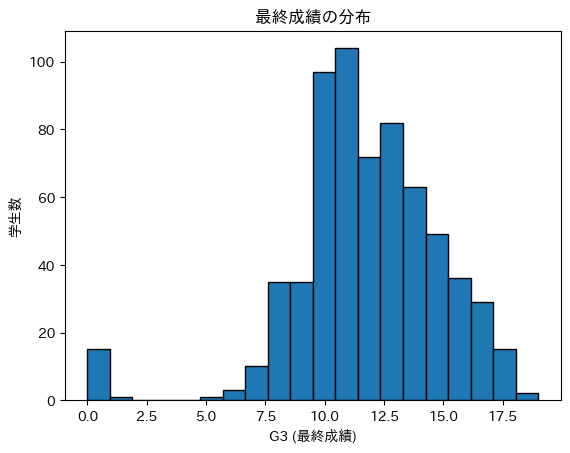

In [7]:
# データの基本情報
print(df[['Dalc', 'G3']].info())

# 'Dalc' と 'G3' の基本統計量
print(df[['Dalc', 'G3']].describe())

# 'Dalc' の分布
plt.hist(df['Dalc'], bins=5, edgecolor='k')
plt.xlabel('Dalc (平日のアルコール摂取量)')
plt.ylabel('学生数')
plt.title('平日のアルコール摂取量の分布')
plt.show()

# 'G3' の分布
plt.hist(df['G3'], bins=20, edgecolor='k')
plt.xlabel('G3 (最終成績)')
plt.ylabel('学生数')
plt.title('最終成績の分布')
plt.show()

低摂取群の回帰直線: y = -0.94x + 13.24
高摂取群の回帰直線: y = -0.65x + 12.83


c:\Users\fuben\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\fuben\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


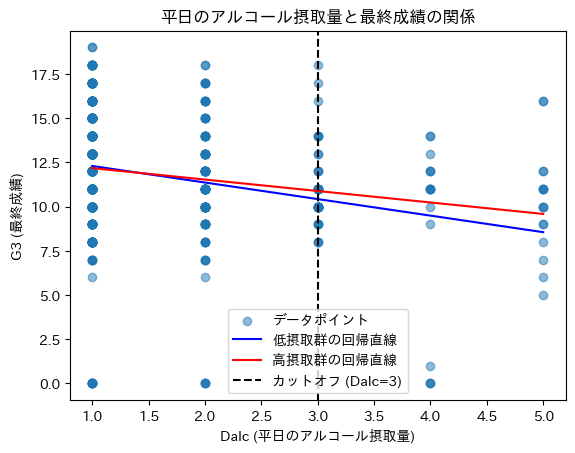

In [11]:
# カットオフ値
cutoff = 3

# カットオフ前後のデータを分割
df_low = df[df['Dalc'] < cutoff]
df_high = df[df['Dalc'] >= cutoff]

# 説明変数と目的変数の設定
X_low = df_low[['Dalc']]
y_low = df_low['G3']
X_high = df_high[['Dalc']]
y_high = df_high['G3']

# 線形回帰モデルの作成
model_low = LinearRegression().fit(X_low, y_low)
model_high = LinearRegression().fit(X_high, y_high)

# 回帰直線の傾きと切片の表示
print(f"低摂取群の回帰直線: y = {model_low.coef_[0]:.2f}x + {model_low.intercept_:.2f}")
print(f"高摂取群の回帰直線: y = {model_high.coef_[0]:.2f}x + {model_high.intercept_:.2f}")

# 散布図の作成
plt.scatter(df['Dalc'], df['G3'], alpha=0.5, label='データポイント')

# 回帰直線の描画
Dalc_range = np.linspace(df['Dalc'].min(), df['Dalc'].max(), 100).reshape(-1, 1)
plt.plot(Dalc_range, model_low.predict(Dalc_range), color='blue', label='低摂取群の回帰直線')
plt.plot(Dalc_range, model_high.predict(Dalc_range), color='red', label='高摂取群の回帰直線')

# カットオフラインの描画
plt.axvline(x=cutoff, color='black', linestyle='--', label='カットオフ (Dalc=3)')

# グラフの装飾
plt.xlabel('Dalc (平日のアルコール摂取量)')
plt.ylabel('G3 (最終成績)')
plt.title('平日のアルコール摂取量と最終成績の関係')
plt.legend()

低摂取群の回帰直線: y = 0.00x + 12.30
高摂取群の回帰直線: y = -0.58x + 12.53


c:\Users\fuben\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\fuben\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


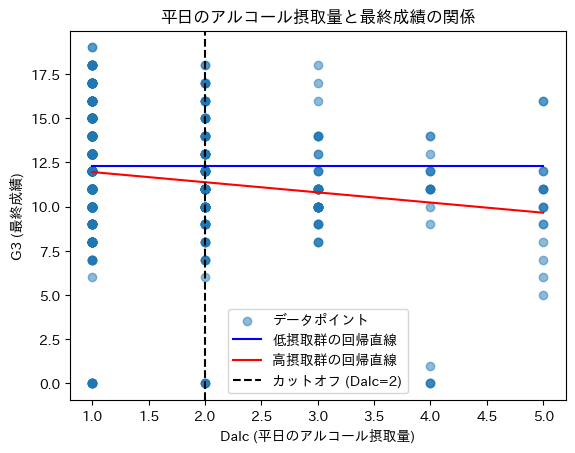

In [15]:
# カットオフ値
cutoff = 2

# カットオフ前後のデータを分割
df_low = df[df['Dalc'] < cutoff]
df_high = df[df['Dalc'] >= cutoff]

# 説明変数と目的変数の設定
X_low = df_low[['Dalc']]
y_low = df_low['G3']
X_high = df_high[['Dalc']]
y_high = df_high['G3']

# 線形回帰モデルの作成
model_low = LinearRegression().fit(X_low, y_low)
model_high = LinearRegression().fit(X_high, y_high)

# 回帰直線の傾きと切片の表示
print(f"低摂取群の回帰直線: y = {model_low.coef_[0]:.2f}x + {model_low.intercept_:.2f}")
print(f"高摂取群の回帰直線: y = {model_high.coef_[0]:.2f}x + {model_high.intercept_:.2f}")

# 散布図の作成
plt.scatter(df['Dalc'], df['G3'], alpha=0.5, label='データポイント')

# 回帰直線の描画
Dalc_range = np.linspace(df['Dalc'].min(), df['Dalc'].max(), 100).reshape(-1, 1)
plt.plot(Dalc_range, model_low.predict(Dalc_range), color='blue', label='低摂取群の回帰直線')
plt.plot(Dalc_range, model_high.predict(Dalc_range), color='red', label='高摂取群の回帰直線')

# カットオフラインの描画
plt.axvline(x=cutoff, color='black', linestyle='--', label='カットオフ (Dalc=2)')

# グラフの装飾
plt.xlabel('Dalc (平日のアルコール摂取量)')
plt.ylabel('G3 (最終成績)')
plt.title('平日のアルコール摂取量と最終成績の関係')
plt.legend()

低摂取群の回帰直線: y = 0.00x + 12.52
高摂取群の回帰直線: y = -0.50x + 12.74


c:\Users\fuben\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\fuben\.pyenv\pyenv-win\versions\3.10.5\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


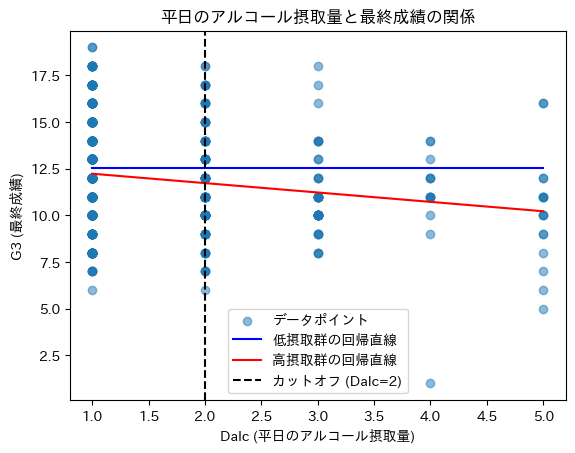

In [20]:
df_filtered = df[df['G3'] != 0]

# カットオフ値
cutoff = 2

# カットオフ前後のデータを分割
df_low = df_filtered[df_filtered['Dalc'] < cutoff]
df_high = df_filtered[df_filtered['Dalc'] >= cutoff]

# 説明変数と目的変数の設定
X_low = df_low[['Dalc']]
y_low = df_low['G3']
X_high = df_high[['Dalc']]
y_high = df_high['G3']

# 線形回帰モデルの作成
model_low = LinearRegression().fit(X_low, y_low)
model_high = LinearRegression().fit(X_high, y_high)

# 回帰直線の傾きと切片の表示
print(f"低摂取群の回帰直線: y = {model_low.coef_[0]:.2f}x + {model_low.intercept_:.2f}")
print(f"高摂取群の回帰直線: y = {model_high.coef_[0]:.2f}x + {model_high.intercept_:.2f}")

# 散布図の作成
plt.scatter(df_filtered['Dalc'], df_filtered['G3'], alpha=0.5, label='データポイント')

# 回帰直線の描画
Dalc_range = np.linspace(df_filtered['Dalc'].min(), df_filtered['Dalc'].max(), 100).reshape(-1, 1)
plt.plot(Dalc_range, model_low.predict(Dalc_range), color='blue', label='低摂取群の回帰直線')
plt.plot(Dalc_range, model_high.predict(Dalc_range), color='red', label='高摂取群の回帰直線')

# カットオフラインの描画
plt.axvline(x=cutoff, color='black', linestyle='--', label='カットオフ (Dalc=2)')

# グラフの装飾
plt.xlabel('Dalc (平日のアルコール摂取量)')
plt.ylabel('G3 (最終成績)')
plt.title('平日のアルコール摂取量と最終成績の関係')
plt.legend()

In [18]:
df_filtered['Dalc'].value_counts()

Dalc
1    443
2    117
3     43
5     17
4     14
Name: count, dtype: int64